**GUVs**

Importamos las librerias necesarias

In [1]:
import numpy as np  # procesamiento matricial
import imageio # para leer/guardar videos
import matplotlib.pyplot as plt  # para mostrar imagenes
plt.rcParams['image.cmap'] = 'gray'
#%matplotlib inline
import cv2 
from google.colab.patches import cv2_imshow

import scipy.special as sc

import math as mt

Leemos el video y obtenemos sus dimenciones *(cantidad de frame del video, 
tamaño de la imaguen pixeles x , pixeles y, RGB 3) 

In [2]:
file_name = "a.mp4" # Crear un objeto lector de videos 
vid_reader = imageio.get_reader(file_name)
mdata = vid_reader.get_meta_data() # ver los metadatos del video
cant_frames= vid_reader.get_length() #longitud
dimensiones = (cant_frames, mdata['source_size'][1], mdata['source_size'][0],3)
print(dimensiones)

(100, 212, 210, 3)


In [3]:
type(vid_reader)

imageio.plugins.ffmpeg.FfmpegFormat.Reader

Creamos una matriz con las dimenciones obtenidas y creamos una lista con los frames del video

cargamos el video en la matriz creada

In [5]:
video_np = np.zeros(dimensiones)
n=0
for i in vid_reader:
  video_np[n,:,:,:]=i
  n=n+1

vid_reader.close() # cerrar lector de video

creamos una matriz para cargar el video en escala de grises, convertimos en escala de grices y cargamos en la matriz

In [6]:
dimensiones_gris = (cant_frames, mdata['source_size'][1], mdata['source_size'][0]) 
video_np_gris = np.zeros(dimensiones_gris)
for i in range(cant_frames):
       video_np_gris[i,:,:]=(video_np[i,:,:,0]+video_np[i,:,:,1]+video_np[i,:,:,2])/3

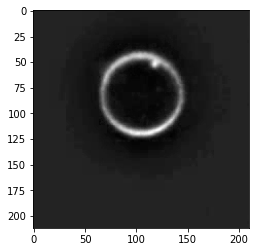

In [ ]:
plt.imshow(video_np_gris[30,:,:])

In [7]:
##
a=input('desea eliminar algun frame s/n: ')
if a=='s':
  varios=input('desea eliminar frames consecutivos s/n: ')
  if varios=='n':
    f=input('Que frame: ')
    video_np_gris=np.delete(video_np_gris,int(f),0)
  if varios=='s':
    f=input('Desde que frame desea eliminar: ')
    cantidad=input('cuantos frames desea eliminar: ' )
    for o in range(int(cantidad)):
      video_np_gris=np.delete(video_np_gris,int(f),0)
  cant_frames= video_np_gris.shape[0]





desea eliminar algun frame s/n: s
desea eliminar frames consecutivos s/n: n
Que frame: 0


prueba de metodo de filtrado y binarizacion para un frame ejemplo.
se toma un frame.
filtro mediana con kernel n.
dos tipos de binarizacion
encuentra contornos 
elimina contornos pequeños si los hay

3
2


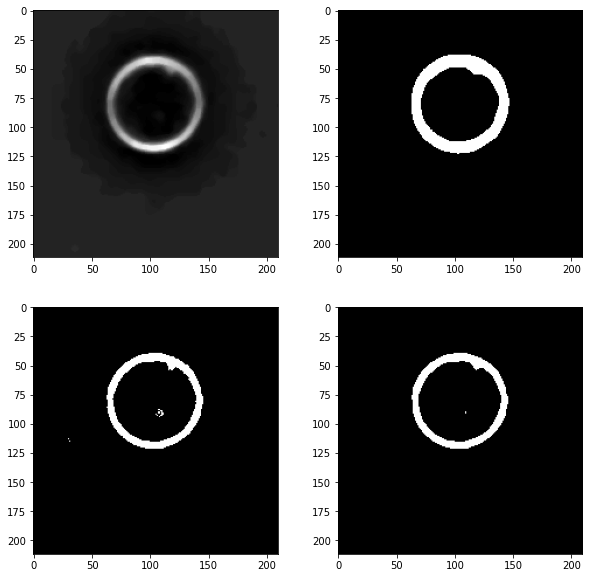

In [9]:
frame=23
imagen=video_np_gris[frame,:,:]
imagen = np.uint8(imagen)
n=7
median = cv2.medianBlur(imagen,n)#filtro de la mediana con kernel 
ret,binarizada = cv2.threshold(median,18,255,cv2.THRESH_BINARY)
binarizada2 = cv2.adaptiveThreshold ( median , 255 , cv2.ADAPTIVE_THRESH_GAUSSIAN_C , cv2.THRESH_BINARY ,19,-1) 
n2=5
binarizadam = cv2.medianBlur(binarizada2,n2)#filtro de la mediana con kernel 

fig = plt.gcf()
fig.set_size_inches(10,10)
plt.subplot(2,2,1),plt.imshow(median)
plt.subplot(2,2,2),plt.imshow(binarizada)
plt.subplot(2,2,3),plt.imshow(binarizada2)
plt.subplot(2,2,4),plt.imshow(binarizadam)

#print(ret)
contorn,hierarchy=cv2.findContours(binarizadam,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
print(len(contorn))

j=0
while len(contorn)>2:
  if  contorn[j].shape[0]<130:    
    del(contorn[j])
    j=j-1
  j=j+1
  if j==len(contorn) and len(contorn)>2:
    print(f"error, hay mas de 2 contornos de tamaño considerable,en el frame:{frame}")
    break    
if len(contorn)<2:
  print(f"error, hay menos de 2 contornos de tamaño considerable,en el frame:{frame}")

if len(contorn)==2:
  if  contorn[1].shape[0]<130:
    del(contorn[1])
    print(f"error, hay menos de 2 contornos de tamaño considerable,en el frame:{frame}")
  if  contorn[0].shape[0]<130:
    del(contorn[0])
    print(f"error, hay menos de 2 contornos de tamaño considerable,en el frame:{frame}")
#print(contorno[0].shape[0])
print(len(contorn))

FUNCION filtro mediana , binarizacion adaptativa,segundo filtro mediana

In [10]:
def binarizar(imagen):
  n=7 #(rango de 1 a 15, paso 2)
  median = cv2.medianBlur(imagen,n)#filtro de la mediana con kernel, n ingresa
  binarizada = cv2.adaptiveThreshold (median,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY ,21,-1) #19 valor de vecindad rango (3 a 175, paso 2), -3 es valor q se resta rang (-10 a 10, paso 1)
  n2=5 #(rango de 1 a 7, paso 2)
  binarizadaf =cv2.medianBlur(binarizada,n2)#filtro de la mediana con kernel 
  return binarizadaf

FUNCION centro de masa coordenadas

In [11]:
def calcularcentro(bin):
  M1 = cv2.moments(bin)
  if M1["m00"]==0: M1["m00"]=1
  cX1 = int(M1["m10"] / M1["m00"])
  cY1 = int(M1["m01"] / M1["m00"])
  # put text and highlight the center
  coord= (cX1, cY1)
  return coord

FUNCION calculo de contorno y elimina contornos pequeños encontrados

In [12]:

def calcularcontorno(binarizadam,frame):
  contorn,hierarchy=cv2.findContours(binarizadam,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
  j=0
  while len(contorn)>2:
    if  contorn[j].shape[0]<130:    
      del(contorn[j])
      j=j-1
    j=j+1
    if j==len(contorn) and len(contorn)>2:
      print(f"error, hay mas de 2 contornos de tamaño considerable,en el frame:{frame}")
      break    
  if len(contorn)<2:
    print(f"error, hay menos de 2 contornos de tamaño considerable,en el frame:{frame}")

  if len(contorn)==2:
    if  contorn[1].shape[0]<130:
      del(contorn[1])
      print(f"error, hay menos de 2 contornos de tamaño considerable,en el frame:{frame}")
    if  contorn[0].shape[0]<130:
      del(contorn[0])
      print(f"error, hay menos de 2 contornos de tamaño considerable,en el frame:{frame}")
  return contorn


FUNCION dibujar contorno se le da la lista de contornos y el conotno a dibujar (0=exterior), entrega una imagen con el contorno dibujado en espesor 2 y color blanco las dimensiones de la imaguen son tomadas de la variable global dimensiones(dimensiones del video) 

In [13]:
def dibujarcontorno(cont,a):
  dibujo =np.zeros((dimensiones[1],dimensiones[2]))
  cv2.drawContours(dibujo, cont, a, 255, 2)
  return dibujo

FUNCION calcular radio y agulo, se le da el contorno y el centro de masas.

In [14]:
def calcularpolares(cont,cm):
  radiocomponentes=cont-cm
  radio=pow((pow(radiocomponentes,2).sum(axis=-1)),1/2).round(2) #Axis no entendi
  angulo=(np.arctan2(radiocomponentes[:,:,1], radiocomponentes[:,:,0]) * 180 / np.pi).round(2)

  pol=np.append(angulo,radio,axis=1)
  return pol

FUNCION primero escalonamos los angulos cada dos grados, luego promediamos los radios encontrados de cada escalones. Discretiza las cordenadas polares a v valores(120 valores por ejemplo), devuelve 120 valores de cordenadas ordenados de -180 a +180 grados. si para algun angulo en particular no hay valores de radio encontrados, el modulo del final promedia los valores adyasentes y le asigna al faltante.

In [15]:
def discretizar(pol,v):
  n=-1 ##discretiza los valores del angulo con escalon de v grados
  for i in pol[:,0]: 
    n=n+1
    encontrado=0
    ma=180
    mi=180-(360/v)
    while encontrado==0:
      if i<=ma and i>mi:
        pol[n,0]=ma
        encontrado=1
      ma=ma-(360/v)
      mi=mi-(360/v)
  pol_ord=pol[np.lexsort(np.fliplr(pol).T)] #OREDENAMOS

  discretizada=np.zeros((v,2))
  c=-1
  for i in discretizada[:,0]:
    c=c+1
    discretizada[c,0]=180-(360/v)*c
  discretizada_ord =np.sort(discretizada,axis=0)

    ##promedia los radios con el mismo angulo
  k=0 #recorrera matriz original
  u=0 #acumulador valores
  l=1 #recorrera matriz nueva
  o=0 #cuenta valores iguales para poder promediar
  e=0 #cuenta errores de falta de radios para algun angulo se utilizara a modo de bandera
  pol_ord=np.append(pol_ord, [[555,555]], axis=0)#se agrega un valor aleatorio al final, para indicar el final.
  while l<=v:
    while pol_ord[k,0]==-180+(l*(360/v)):
      u=u+pol_ord[k,1]
      o=o+1
      k=k+1
    if o==0:
      #print(f"error, no hay valores para el angulo {discretizadaINord[l-1,0]} grados")
      o=1 #evita div por 0
      e=e+1
    discretizada_ord[l-1,1]=u/o
    l=l+1
    o=0
    u=0

  if e!=0 and e<20:
    #ARREGLA FALTA DE ANGULOS 
    m=0
    while m<len(discretizada_ord):
      if discretizada_ord[m,1]==0:
        if m==0:
          discretizada_ord[m,1]=(discretizada_ord[(len(discretizada_ord))-1,1]+discretizada_ord[m+1,1])/2
          #Si la primera punta no tiene valor, entonces saca promedioentre el sig elemento y la otra punta
        if m==len(discretizada_ord)-1==0:
          discretizada_ord[m,1]=(discretizada_ord[0,1]+discretizada_ord[m-1,1])/2
        #Si la otra punta no tiene elemento saca promedio entre el penultimo elemento y la primera punta
        discretizada_ord[m,1]=(discretizada_ord[m-1,1]+discretizada_ord[m+1,1])/2
        #Si el cero esta en cualquier otra parte saca el promedio entre el anterior y el siguiente elemento.
      m=m+1

  return discretizada_ord


FUNCION: Sentrega la matriz de cordenadas polares discretizada y entrega los coficientes a y b

In [16]:
def calcularcoeficientes(discre):
  An=np.zeros([50])
  for n in range(1,51):
    cos=np.cos(n*discre[:,0]*np.pi/180)
    cos_radio=cos*discre[:,1]
    sumatoria=0
    for h in range(cos_radio.shape[0]):
      suma=cos_radio[h]+cos_radio[(h+1)%cos_radio.shape[0]]
      resta=discre[(h+1)%cos_radio.shape[0],0]*np.pi/180-discre[h,0]*np.pi/180
      if (h+1)%cos_radio.shape[0]==0:
        resta=resta+2*np.pi
      producto=suma*resta
      sumatoria=sumatoria+producto
    An[n-1]=sumatoria/(2*np.pi)

  Bn=np.zeros([50])
  for n in range(1,51):
    sin=np.sin(n*discre[:,0]*np.pi/180)
    sin_radio=sin*discre[:,1]
    sumatoria=0
    for h in range(sin_radio.shape[0]):
      suma=sin_radio[h]+sin_radio[(h+1)%sin_radio.shape[0]]
      resta=discre[(h+1)%sin_radio.shape[0],0]*np.pi/180-discre[h,0]*np.pi/180
      if (h+1)%sin_radio.shape[0]==0:
        resta=resta+2*np.pi
      producto=suma*resta
      sumatoria=sumatoria+producto
    Bn[n-1]=sumatoria/(2*np.pi)
  return (An,Bn)

Prueba de las funciones anteriores

(106, 81)
coordenads:
(106, 81)
cantidad de contornos:
2
datos de contorno externo:
231
datos de contorno interno:
200


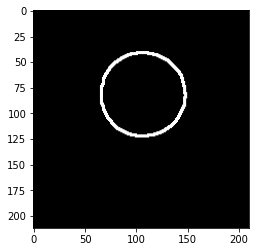

In [17]:
frame=30
imagen=video_np_gris[frame,:,:]
imagen = np.uint8(imagen)
binari=binarizar (imagen)
#plt.imshow(binari)
contorno=calcularcontorno(binari,frame)
dibujocontorno =dibujarcontorno(contorno,0)
coordenadas= calcularcentro (dibujocontorno)
coordenadas2= calcularcentro (binari)
print (coordenadas2)#cento de la binarizada
plt.imshow(dibujocontorno)

print('coordenads:')
print (coordenadas)# centro mejorado, solo del contorno
print('cantidad de contornos:')
print(len(contorno))
print('datos de contorno externo:')
print(contorno[0].shape[0])
print('datos de contorno interno:')
print(contorno[1].shape[0])

In [18]:
polares= calcularpolares(contorno[0],coordenadas)
print(polares.shape)
#print(polares)
disc=discretizar(polares,180)
print(disc.shape)
#print(disc)

(231, 2)
(180, 2)


In [19]:
An,Bn=calcularcoeficientes(disc)
print(An,Bn)

[ 0.51462853  0.19372771  0.17859442 -0.09517831 -0.00851776 -0.03063455
 -0.01691757 -0.00135023 -0.04800774 -0.02061183  0.0088535   0.01051708
  0.00177374  0.02359654 -0.00590057  0.03581727  0.04864994 -0.07240832
  0.04543883 -0.00729167  0.06105475 -0.01516355  0.07076553 -0.03078105
  0.03588874 -0.01571193  0.00104063 -0.00616907 -0.01651478  0.02583333
 -0.0456208   0.00775538 -0.04037821  0.05361795 -0.03491679 -0.02963201
 -0.01009746  0.00853819 -0.02405    -0.04514829 -0.03221852  0.02242857
  0.03467929 -0.01934496  0.01366667 -0.02144991  0.02193942 -0.00624881
  0.01179409 -0.01420634] [ 0.57200829  0.07062143  0.00915508 -0.00180485 -0.05513018 -0.03040917
  0.05935111  0.01190763  0.12811983  0.04711256  0.07375597  0.06536719
  0.01667891 -0.04466913 -0.02545555 -0.04218268 -0.06364371  0.02717641
 -0.01143614  0.04542123 -0.02841511 -0.01491066  0.00487629  0.01256029
  0.04292607  0.03214264  0.03334745  0.00824329  0.03006612  0.07515176
  0.01677693  0.01767031 

Prueba dibujo de contornos, contorno exterior, al calcuar el centro de masas sobre esta imagen nos idependizamos de otras vesiculas o manchas q pueda haber por fuera de la vesicula principal

In [20]:
if cant_frames > 99:
  p=cant_frames//99
else:
  p=1

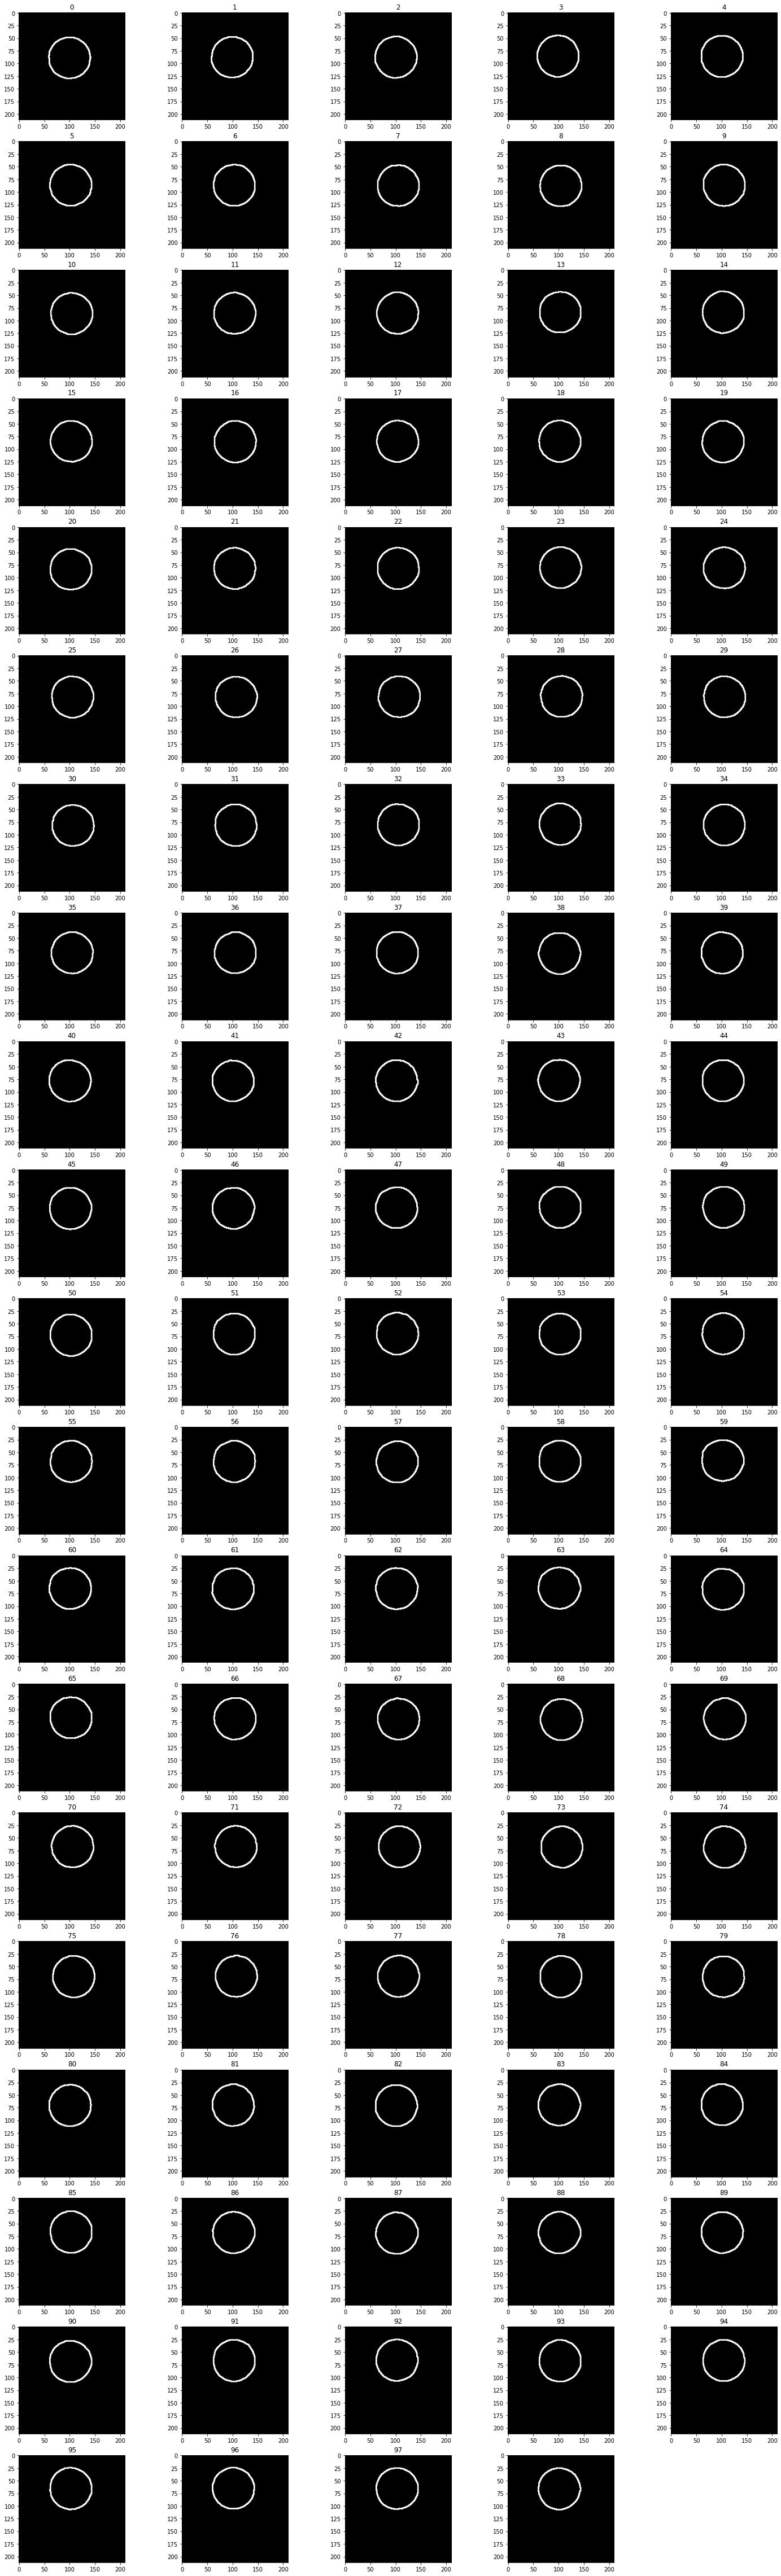

In [21]:

fig = plt.gcf()
fig.set_size_inches(25,125)
e=0
for i in range(0,cant_frames,p):
  e=e+1
  imagen = video_np_gris[i,:,:]
  imagen = np.uint8(imagen)
  binari = binarizar (imagen)
  contorno = calcularcontorno(binari,i)
  dibujocontorno = dibujarcontorno(contorno,0)
  #print(i)
  plt.title(i-1)
  plt.subplot(30,5,e),plt.imshow(dibujocontorno)


aplicamos las funciones anteriores para obtener los coeficientes _aq_ y _bq_ de cada frame. (_aq_ coeficientes a subindice q)

In [22]:
AyB=np.zeros([cant_frames, 50, 2])
r=np.zeros([cant_frames, 180])
for j in range(cant_frames):
  imagen=video_np_gris[j,:,:]
  imagen = np.uint8(imagen)
  binari=binarizar (imagen)
  contorno=calcularcontorno(binari,j)
  dibujocontorno =dibujarcontorno(contorno,0)
  coordenadas= calcularcentro (dibujocontorno)
  polares= calcularpolares(contorno[0],coordenadas)
  disc=discretizar(polares,180)
  An,Bn=calcularcoeficientes(disc)
  AyB[j,:,0]=An
  AyB[j,:,1]=Bn
  r[j,:]=(disc[:,1])# radios 

In [23]:
def eliminar(f,c,r,AyB):
  for i in range(0,c,1):
    r=np.delete(r,f, axis=0)
    AyB=np.delete(AyB,f, axis=0) 
  return(r,AyB)


In [24]:
#r,AyB=eliminar (23,1,r,AyB)

graficamos el radio de cada frames

Grafico


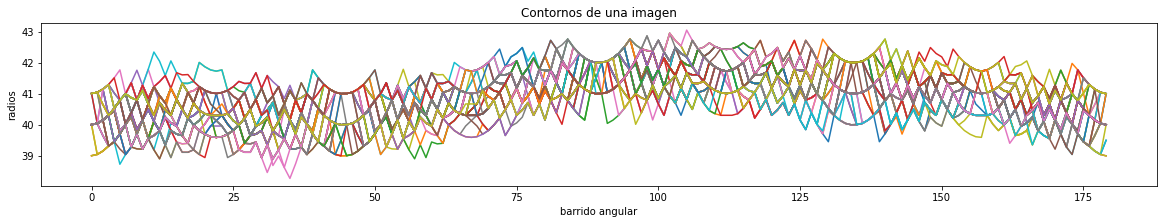

In [25]:
R=r.T
plt.figure(figsize=(20,3))
plt.plot(R[:,:])   # Dibuja el gráfico
plt.title("Contornos de una imagen")   # Establece el título del gráfico
plt.ylabel("radios")   # Establece el título del eje x
plt.xlabel("barrido angular")   # Establece el título del eje y

#plt.yticks(np.arange(0,55,10))
print('Grafico')

In [26]:
np.where(R==np.amin(R))


(array([35]), array([36]))

In [27]:
np.where(R==np.amax(R))

(array([105]), array([96]))

In [28]:
np.amin(r[:,:])

38.28

In [29]:
np.amax(r[:,:]) #a mostrar nomas

43.05

graficamos elredio promedio de cada frame 

Grafico
max 41.234097222222225
min 40.47077777777778
prom 40.87412177328844


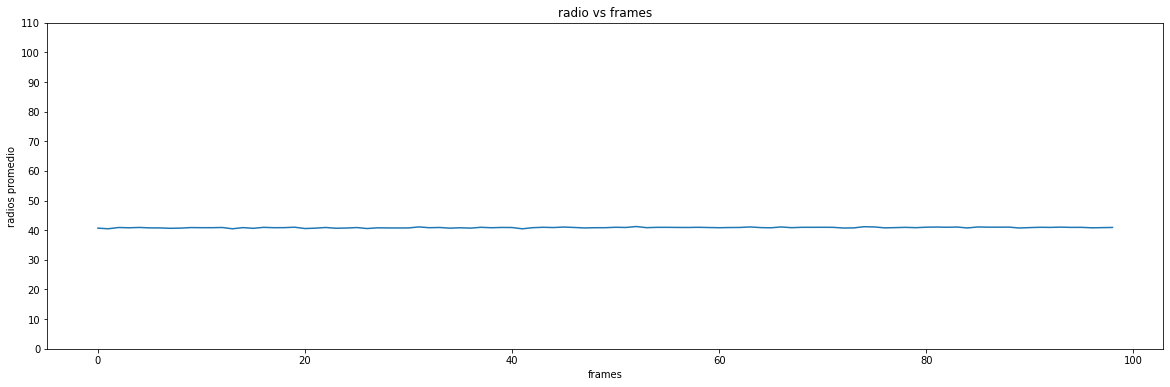

In [30]:
Rpromedio=np.mean(r,axis=1)
Rprom=np.mean(Rpromedio)

plt.figure(figsize=(20,6))
plt.plot(Rpromedio[:])   # Dibuja el gráfico
plt.title("radio vs frames")   # Establece el título del gráfico
plt.ylabel("radios promedio")   # Establece el título del eje x
plt.xlabel("frames")   # Establece el título del eje y

plt.yticks(np.arange(0,120,10))
print('Grafico')

print(f"max {max(Rpromedio)}")
print(f"min {min(Rpromedio)}")
print(f"prom {np.mean(Rpromedio)}")


In [31]:
ok=input('continuar? s/n: ')

  

continuar? s/n: s


Calculamos los _Vq_

In [32]:
AyBn=AyB*(1/Rprom)
AyBmedia=np.zeros([50,2])
AyBmedia[:,0]=np.mean(AyBn[:,:,0],axis=0)
AyBmedia[:,1]=np.mean(AyBn[:,:,1],axis=0)
#print(AyBmedia)
AyBresta=np.zeros([AyBn.shape[0],50,2])
for q in range(50):
  AyBresta[:,q,0]=AyBn[:,q,0]-AyBmedia[q,0]
  AyBresta[:,q,1]=AyBn[:,q,1]-AyBmedia[q,1]
AyBcuadrado=AyBresta*AyBresta
Vq=0.25*(np.mean(AyBcuadrado[:,:,0],axis=0)+np.mean(AyBcuadrado[:,:,1],axis=0))
print(Vq)

[2.93515716e-05 5.65689300e-06 2.93621100e-06 2.66071573e-06
 2.02587544e-06 1.77165439e-06 1.29365795e-06 1.24299267e-06
 1.18843990e-06 1.07034765e-06 9.98327962e-07 9.33366539e-07
 8.59255013e-07 6.38672062e-07 6.78707259e-07 7.09083540e-07
 5.78901615e-07 5.86579884e-07 4.10135079e-07 4.29037991e-07
 4.16005586e-07 4.17807481e-07 3.28070288e-07 2.31491278e-07
 3.06382058e-07 3.02007724e-07 2.67156190e-07 2.20252384e-07
 1.99105004e-07 2.43484855e-07 1.93912132e-07 1.66196391e-07
 1.80533079e-07 1.86447615e-07 1.75528304e-07 1.87949717e-07
 1.56598504e-07 1.95212663e-07 1.46403178e-07 1.65431070e-07
 1.53966871e-07 1.83537860e-07 1.66218686e-07 1.81651248e-07
 1.42094478e-07 1.68519442e-07 1.44458921e-07 1.80489832e-07
 1.26383482e-07 1.84725448e-07]


Se calculan los polinomios de legendre asociados, valuados en 0, con q orden del polinomio(refiere al orden de derivacion del polinomio),y l grado del polinomio

In [33]:
q_max=50#order of the Legendre function derivation q menor o igual a l identico a m. Era 25 ''''''''''''''orden del polinimio
l_max=200 # degree of the Legendre function, identico a n ''''''''''''''''''''''''''''''''''''''''''''grado del polinomio
polypolderi=sc.lpmn(q_max, l_max, 0) #Aqui Pmn es Plq que seria q=m y l=n- --q orden de derev l grado del polonimio----- en 
#Return two arrays of size (m+1, n+1) containing Pmn(z) and Pmn'(z) for all orders from 0..m and degrees from 0..n.
#Retorna dos matrices de tamaño (m+1, n+1) que contienen Pmn(z) y Pmn'(z) para todos los órdenes desde 0..m y grados desde 0..n.

pol=polypolderi[0]
pol[0,:]# primer numero (q) orden del polinomio (asociado al orden de derivacion del polinomio) y el segundo(l) es el grado (asociado al grado de derivacion del polinomio)
# se muestran los polinomios de legendre de orden de derivacion 0, es decir,los propiamente dichos polinomios de legendre valuados en x=0

array([ 1.        ,  0.        , -0.5       , -0.        ,  0.375     ,
        0.        , -0.3125    , -0.        ,  0.2734375 ,  0.        ,
       -0.24609375, -0.        ,  0.22558594,  0.        , -0.20947266,
       -0.        ,  0.19638062,  0.        , -0.18547058, -0.        ,
        0.17619705,  0.        , -0.1681881 , -0.        ,  0.16118026,
        0.        , -0.15498102, -0.        ,  0.14944598,  0.        ,
       -0.14446445, -0.        ,  0.13994993,  0.        , -0.13583376,
       -0.        ,  0.1320606 ,  0.        , -0.12858532, -0.        ,
        0.12537069,  0.        , -0.12238567, -0.        ,  0.11960418,
        0.        , -0.11700409, -0.        ,  0.1145665 ,  0.        ,
       -0.11227517, -0.        ,  0.11011603,  0.        , -0.10807685,
       -0.        ,  0.10614691,  0.        , -0.10431679, -0.        ,
        0.10257817,  0.        , -0.10092369, -0.        ,  0.09934675,
        0.        , -0.0978415 , -0.        ,  0.09640265,  0.  

Funcion factor de normalizacion _Nlq_

image.png

In [34]:
def factorn (q,l):
  factorial_resta=mt.factorial(l-q)
  factorial_suma=mt.factorial(l+q)
  pi=4*mt.pi
  factor_normalizacion=(((2*l)+1)/pi)*(factorial_resta/factorial_suma)
  return factor_normalizacion

FUNCION: CALCULAR DENOMINADOR, NUMERADOR Y LUEGO LA SUMATORIA

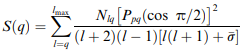

In [35]:
def denom (l,tension):
  denominador=(l+2)*(l-1)*((l*(l+1))+tension)
  return denominador

In [36]:
def numerad (q,l):
  numerador=factorn (q,l)*pol[q,l]*pol[q,l]
  return numerador

In [37]:
def sumatoria (q,t):
  sumatoria=0
  for l in range(q,200):
    if l>=2:
      termino=numerad(q,l)/denom(l,t)
      sumatoria=sumatoria + termino
    Sq=sumatoria
  return Sq

FUNCION: calculamos k 

In [38]:
def calculark (q):
  kBT=4*10**(-21) #julios constate por temperatura en kelvin
  radio_prom= 0.3*(10**(-6)) #metros 0.3micrometro
  kp=1.4*(10**(-22))
  teffp=1*(10**(-6))
  listateff=[]
  teffmin=-1*(10**(-9))
  teffmax=1*(10**(-4))
  listateff.append(teffmin)
  listateff.append(teffmax)
  p=0
  error=100
  while error>1:
    p=p+1
    print(f"ciclo {p}")
    paso=(max(listateff)-min(listateff))/400
    inicio=min(listateff)
    fin=max(listateff)
    print(f" k: {kp}+/-{round(error,1)}%")
    for i in range(6):
      listak=[]
      for teff_indice in np.arange(inicio,fin,paso):#teff_idice es la teff que ira tomando valores del rango 
        t=(teff_indice*radio_prom*radio_prom)/kp# adimensional
        Sq=sumatoria (q,t)
        k=Sq*kBT/Vq[q]
        listak.append(k)
      kp=sum(listak)/float(len(listak))
      print(i,min(listak),max(listak))
      error=abs((max(listak)-min(listak))/kp)*40

    paso=(max(listak)-min(listak))/400
    inicio=min(listak)
    fin=max(listak)
    print(f" tension: {teffp}+/-{max(listateff)-min(listateff)}")
    for i in range (3):
      listateff=[]
      for k_indice in np.arange(inicio,fin,paso):
        t=(teffp*radio_prom*radio_prom)/k_indice# adimensional 
        Sq=sumatoria (q,t)
        teff=Sq*t*kBT/(Vq[q]*radio_prom*radio_prom)
        listateff.append(teff)
      teffp=sum(listateff)/float(len(listateff))
      print(i,min(listateff),max(listateff))
    print('-----')
  print('----------------------------------------')
  print(f" q={q}")
  print(f" k: {kp}+/-{round(error,1)}%")
  print(f" tension efectiva: {teffp}+/-{max(listateff)-min(listateff)}")
  print('----------------------------------------')  
  return kp

In [39]:
#este calculo puede tomar unos minutos

matriz_k=np.zeros((q_max,2)) #usamos la funcion mas importante
for i in range(0,q_max-1):
  matriz_k[i,1]=calculark (i)
  matriz_k[i,0]=i
print(matriz_k)
suma=0
can=0
for j in range(6,25): #parametros van a ser entradas luego de ver el grafico de 6 y 25
  suma=suma+matriz_k[j,1]
  can=can+1
promedio=suma/can
print (promedio)

ciclo 1
 k: 1.4e-22+/-100%
0 8.373595086434126e-23 6.857621406675138e-19
1 1.3072784394646184e-21 6.204560244938636e-19
2 4.782360489164391e-21 6.175825243308692e-19
3 1.2289228002785376e-20 6.169368474057391e-19
4 2.421727453270966e-20 6.167384982612474e-19
5 3.843484298436698e-20 6.166644320066724e-19
 tension: 1e-06+/-0.00010000100000000001
0 9.798077484674458e-07 1.1797681078790197e-05
1 2.519493523547187e-06 2.2067178445357995e-05
2 5.424789273504595e-06 3.189824670607978e-05
-----
ciclo 2
 k: 1.0923830501701037e-19+/-211.7%
0 1.3099699907219667e-19 3.674398086256056e-19
1 2.050780422705765e-19 4.533308563547212e-19
2 2.5320702496048703e-19 4.913047990598498e-19
3 2.7572376685286983e-19 5.059128895493955e-19
4 2.8468310448776566e-19 5.11271283753801e-19
5 2.8801838934151525e-19 5.132054646190909e-19
 tension: 1.1511863597204858e-05+/-2.6473457432575185e-05
0 1.055991274306092e-05 1.5915530220619715e-05
1 1.1489772211643226e-05 1.709657782364915e-05
2 1.2174638525885514e-05 1.79485

k promedio 
1.347760339943991e-19


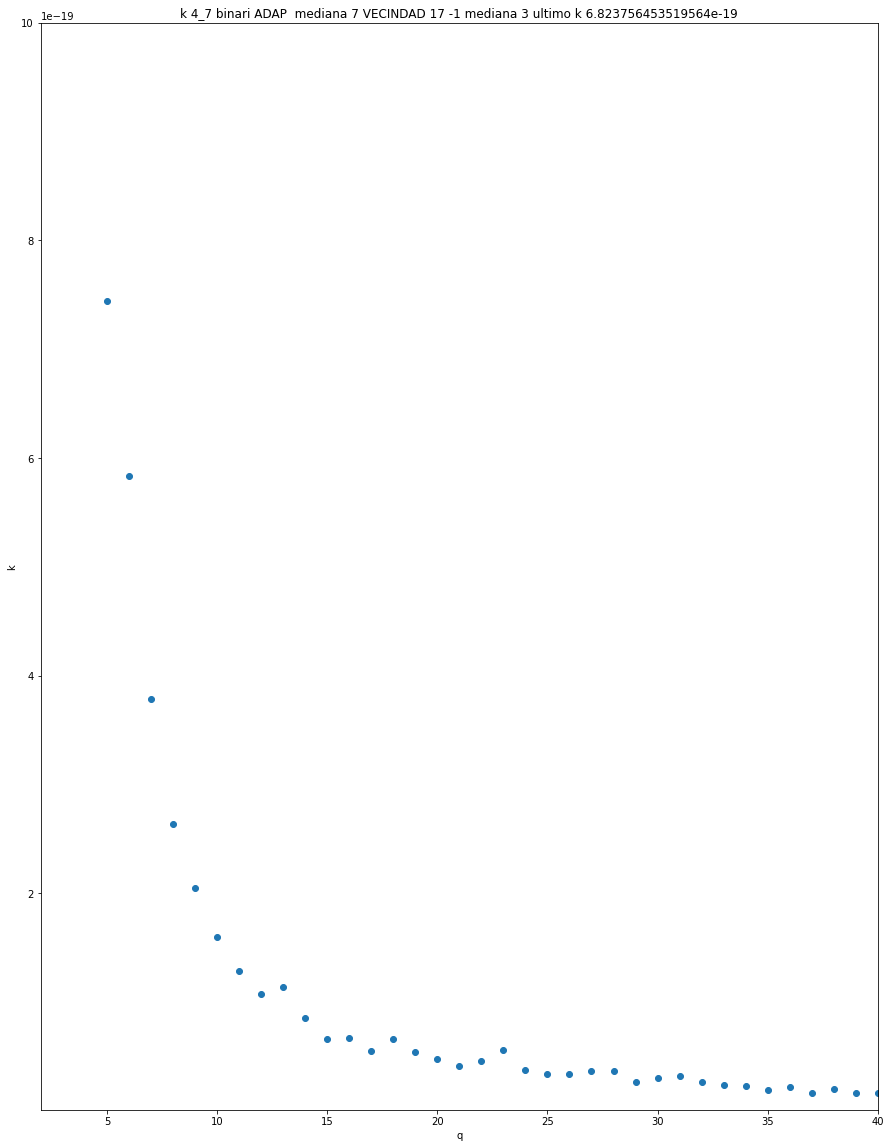

In [40]:
kpromedio=promedio 
plt.figure(figsize=(15,20))
plt.scatter(matriz_k[:,0],matriz_k[:,1])   # Dibuja el gráfico
plt.title("k 4_7 binari ADAP  mediana 7 VECINDAD 17 -1 mediana 3 ultimo k 6.823756453519564e-19")   # Establece el título del gráfico
plt.ylabel("k")   # Establece el título del eje x
plt.xlabel("q")   # Establece el título del eje y
plt.ylim(0.1*(10**(-20)),100*(10**(-20)))
plt.xlim(2,40)
#plt.yticks(np.arange(1*(10**(-18)),25*(10**(-19))))
#plt.xticks(np.arange(0,50,1))
print("k promedio ")
print (promedio)